In [89]:
import torch
import numpy as np
import pandas as pd
import torch.nn.functional as F
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

In [90]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]

X , y = datasets.make_blobs(n_samples= n_pts, n_features = 2, centers = centers ,random_state = 123, cluster_std = 0.4 )
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100, 1))

In [91]:
X.shape,y.shape

((100, 2), (100,))

In [92]:
def scatter_plot():

    plt.scatter(X[y == 0, 0], X[y == 0, 1])
    plt.scatter(X[y == 1, 0], X[y == 1, 1])
    plt.grid(True)

In [93]:
class Model(nn.Module):

    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self,X):
        pred = torch.sigmoid(self.linear(X))
        return pred

    def predict(self, x):

        pred = self.forward(x)
        if pred > 0.5:
            return 1
        else:
            return 0

In [94]:
torch.manual_seed(2)
model = Model(2,1)

print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [95]:
for name,param in model.named_parameters():
    print(name, "\t", param)
    print("".center(10,"-"))

linear.weight 	 Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True)
----------
linear.bias 	 Parameter containing:
tensor([0.1939], requires_grad=True)
----------


In [96]:
[w, b] = model.parameters()
w1, w2 = w.view(2)

print(w1.item(),w2.item(),b.item())

0.1622033268213272 -0.1682732254266739 0.1939089596271515


In [97]:
def get_params():
    return (w1.item(), w2.item(), b[0].item())

In [98]:
X.max(),X.min()

(1.3952573353991813, -1.792422003167725)

In [99]:
def plot_fit(titles):

    w1, w2 , b1 = get_params()
    x1 = np.array([-2.0, 2.0])
    x2 = (w1*x1 + b1) / -w2

    #plt.figure(figsize =(6,6))
    plt.title(titles)
    plt.plot(x1,x2,"r")
    scatter_plot()

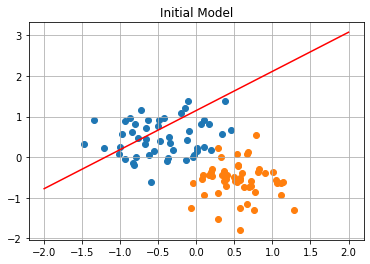

In [100]:
plot_fit("Initial Model")

In [101]:
#y = x1*w1 + x2*w2 + b1
# y = 0 dersek -- >     x2 = (w1*x1 + b1) / -w2 çıkar

In [102]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [103]:
epochs = 1000
losses = []

for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred,y_data)

    if i % 100 == 1:
        print("Epoch ", i , "Loss : ", loss.item())

    losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch  1 Loss :  0.6134997010231018
Epoch  101 Loss :  0.32632696628570557
Epoch  201 Loss :  0.22422374784946442
Epoch  301 Loss :  0.1744050532579422
Epoch  401 Loss :  0.14471562206745148
Epoch  501 Loss :  0.12477829307317734
Epoch  601 Loss :  0.1103111058473587
Epoch  701 Loss :  0.0992337018251419
Epoch  801 Loss :  0.09041335433721542
Epoch  901 Loss :  0.08317967504262924


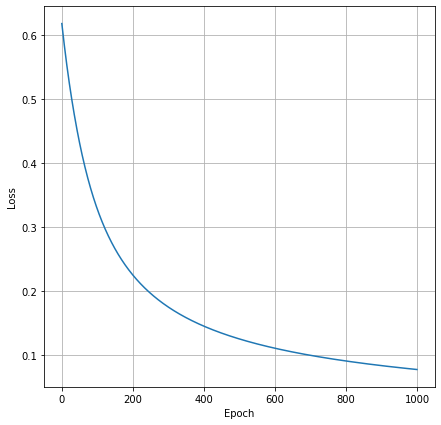

In [104]:
plt.figure(figsize = (7,7))
plt.plot(range(epochs) , losses)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid(True)
plt.show()

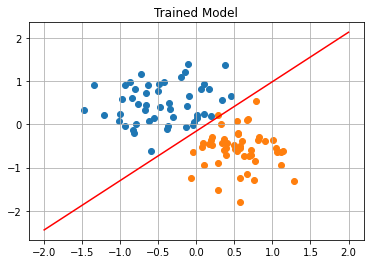

In [105]:
plot_fit("Trained Model")

Red Point Positive Probability = 0.9995723366737366
Black Point Positive Probability = 0.00012562588381115347

Red Point In Class = 1
Black Point In Class = 0



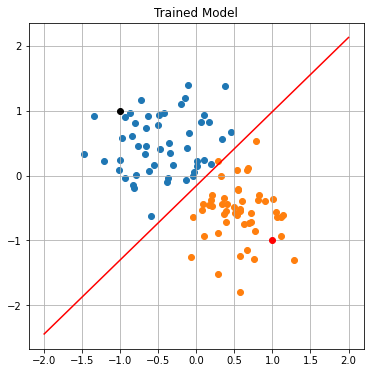

In [108]:
point1 = torch.Tensor([1.0,-1.0])
point2 = torch.Tensor([-1.0, 1.0])

plt.figure(figsize =(6,6))

plt.plot(point1.numpy()[0] , point1.numpy()[1],"ro")
plt.plot(point2.numpy()[0] , point2.numpy()[1],"ko")

print("Red Point Positive Probability = {}".format(model.forward(point1).item()))
print("Black Point Positive Probability = {}".format(model.forward(point2).item()))
print()
print("Red Point In Class = {}".format(model.predict(point1)))
print("Black Point In Class = {}".format(model.predict(point2)))
print()

plot_fit("Trained Model")